<a href="https://colab.research.google.com/github/AJ-Abisola/CNN-Clothes-Classifier/blob/main/CNN_Clothes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEEP LEARNING WITH CNN**

*By AJ ABISOLA*

**This Project will focus on using the Fashion MNIST dataset to build a categorical clothing classifier with Convolutional Neural Networks. The dataset includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
#Improting and reading in the data
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**Visualizing the Data**



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
len(x_train)

60000

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

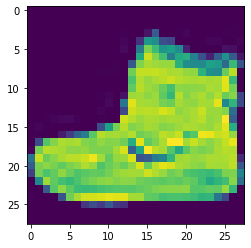

In [5]:
plt.imshow(x_train[0])

In [6]:
y_train[0]

9

*According to labels listed above, it shows that the label 9 is an ankle boot. It can also be clearly seen the displayed image is an ankle boot.*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


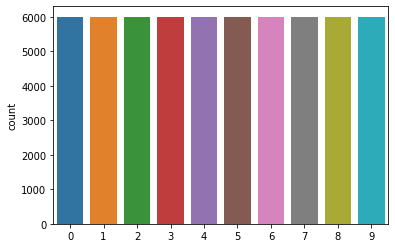

In [7]:
sns.countplot(y_train)

*This shows a well balanced dataset with equal number of data across all labels*

## Preprocessing the Data

**The Data needs to be properly prepared before feedin it into a neural network**

*   *Normalize the X train and X test data by dividing by the max value(255) of the image arrays.*

*   *Reshape the X arrays to include a 4th dimension of a single channel.*

*   *Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras. Otherwise, the network will think this is some sort of regression problem on a continuous axis.*






In [8]:
x_train.max()

255

In [9]:
x_train = x_train/255

In [10]:
x_test = x_test/255

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape(60000,28,28,1)

In [13]:
x_test = x_test.reshape(10000,28,28,1)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
#Shows our labels are literally categories of numbers
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
y_cat_train = to_categorical(y_train)

In [17]:
y_cat_test = to_categorical(y_test)

## Building the Model

**Using Keras to create a model consisting of the following layers:**

* *2D Convolutional Layer, filters=64 and kernel_size=(4,4)*

* *Pooling Layer where pool_size = (2,2)*

* *Flatten Layer*

* *2D Convolutional Layer, filters=32 and kernel_size=(4,4)*

* *Pooling Layer where pool_size = (2,2)*

* *Flatten Layer*

* *Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation*

* *Final Dense Layer of 10 Neurons with a softmax activation. This aligns with the number of labels.*

**The following parameters are used:**

*loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']*

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

# CONVOLUTIONAL LAYER 1
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu'))
# POOLING LAYER 1
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [21]:
from tensorflow.keras.utils import plot_model

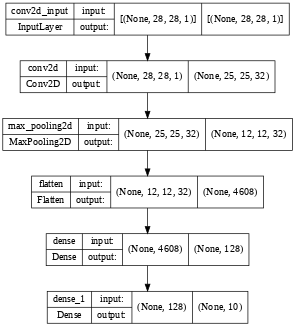

In [22]:
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True, dpi=50, to_file='cnn_clothes.png')

### Training the Model

*Fitting the model to the x_train set for 20 epochs , while using the the splitted test data as a validation data. To avoid overfitting, Early stoppping that monitors the validation accuracy is called.*

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy',patience=2)

In [24]:
model.fit(x_train,y_cat_train,epochs=20, validation_data=(x_test,y_cat_test), callbacks = [early_stop] )

Epoch 1/20
1875/1875 [==============================] - 48s 25ms/step - loss: 0.3924 - accuracy: 0.8597 - val_loss: 0.3057 - val_accuracy: 0.8904
Epoch 2/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2736 - accuracy: 0.9020 - val_loss: 0.2822 - val_accuracy: 0.8973
Epoch 3/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2382 - accuracy: 0.9152 - val_loss: 0.2812 - val_accuracy: 0.8990
Epoch 4/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2129 - accuracy: 0.9247 - val_loss: 0.2889 - val_accuracy: 0.9021
Epoch 5/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1953 - accuracy: 0.9298 - val_loss: 0.3105 - val_accuracy: 0.9008
Epoch 6/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1815 - accuracy: 0.9345 - val_loss: 0.2766 - val_accuracy: 0.9115
Epoch 7/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1688 - accuracy: 0.9410 - val_loss: 0.3051 -

### Evaluating the Model

*To evaluate the model, we'd take a look at the accuracy,precision,recall,f1-score metrics the model achieved on the x_test data set.*

In [25]:
model.metrics_names

['loss', 'accuracy']

In [26]:
#Shows the loss, accuracy, validation loss and Validation accuracy
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3149 - accuracy: 0.9046


[0.31493911147117615, 0.9046000242233276]

In [30]:
from sklearn.metrics import classification_report

In [31]:
predictions = model.predict(x_test)

In [32]:
import numpy as np

In [33]:
actual_prediction = np.argmax(predictions, axis=1)

In [34]:
y_cat_test.shape

(10000, 10)

In [35]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [36]:
actual_prediction[0]

9

In [37]:
y_test[0]

9

In [38]:
print(classification_report(y_test,actual_prediction))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.87      0.85      1000
           3       0.91      0.94      0.92      1000
           4       0.89      0.79      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.67      0.72      1000
           7       0.93      0.98      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



## Conclusion

The model performed pretty well, with no evaluation metric below 0.7. This is also a pointer to how balanced the dataset used is. 